## Getting data from NOAA web-page

In [1]:
!wget -O land_global_temperature_annomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:31--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.171, 205.167.25.172, 2610:20:8040:2::171, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.171]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_annomaly-1880-2015.csv”

land_global_tempera     [ <=>                ]  23,24K   128KB/s    in 0,2s    

2017-01-04 13:27:32 (128 KB/s) - “land_global_temperature_annomaly-1880-2015.csv” guardado [23796]



In [2]:
import numpy 

In [3]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [4]:
numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv',delimiter=',',skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [5]:
T_land = numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv',delimiter=',',skiprows=4)

In [6]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [7]:
numpy.shape(T_land)

(1632, 2)

In [8]:
T_land.shape

(1632, 2)

In [10]:
from matplotlib import pyplot 
%matplotlib inline 

In [11]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [12]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

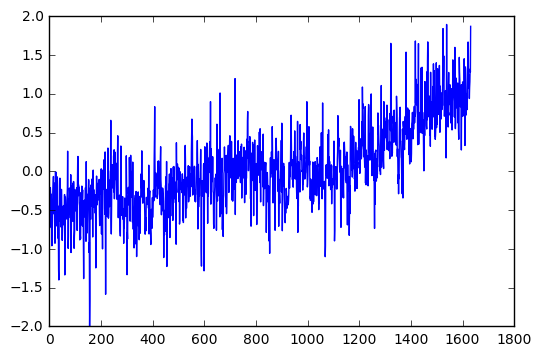

In [13]:
pyplot.plot(T_land[:,1])

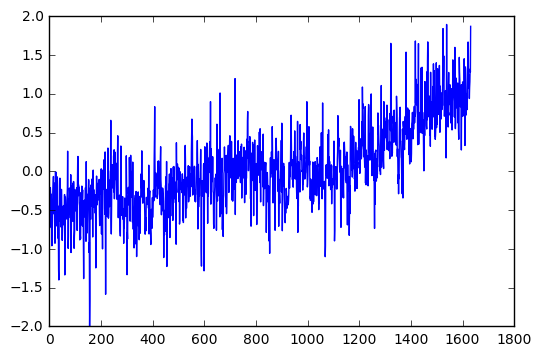

In [14]:
#Remember that to remove the ugly line at the beggining of the plot
#we use a ; at the end of the command
pyplot.plot(T_land[:,1]);

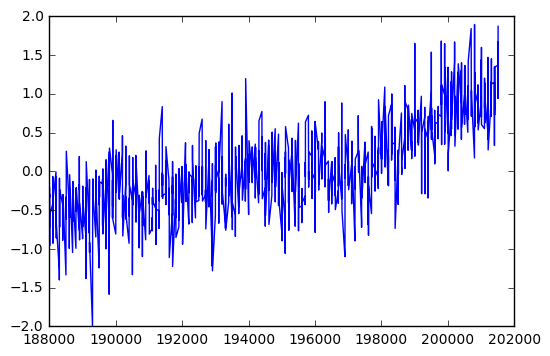

In [15]:
pyplot.plot(T_land[:,0],T_land[:,1]);

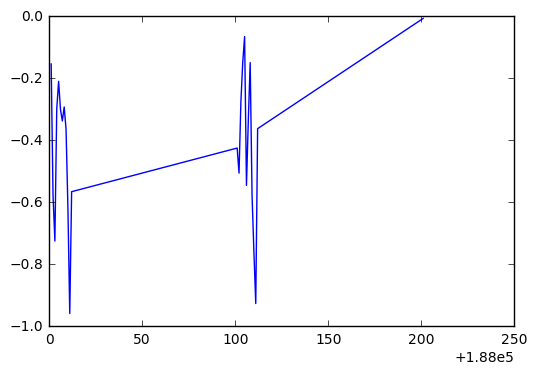

In [16]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

# Using `numpy.arange()` for creating our date-array

In [18]:
date = numpy.arange('1880','2016',dtype=('datetime64[M]'))

In [19]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [20]:
len(date)

1632

In [21]:
dummy = numpy.linspace(1,1632,1632)

In [22]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


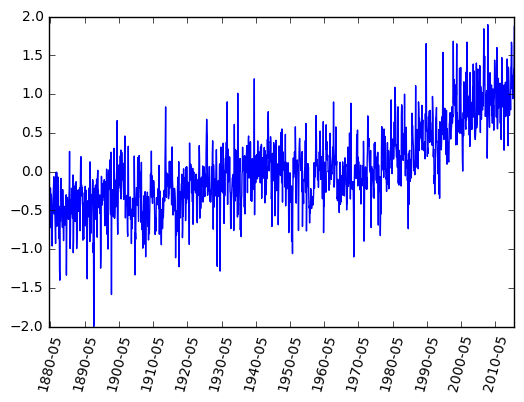

In [29]:
pyplot.xticks(dummy[4::12*10],date[4::12*10],rotation=75)
pyplot.plot(dummy,T_land[:,1]);

In [34]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif' 
rcParams['font.size'] = 16

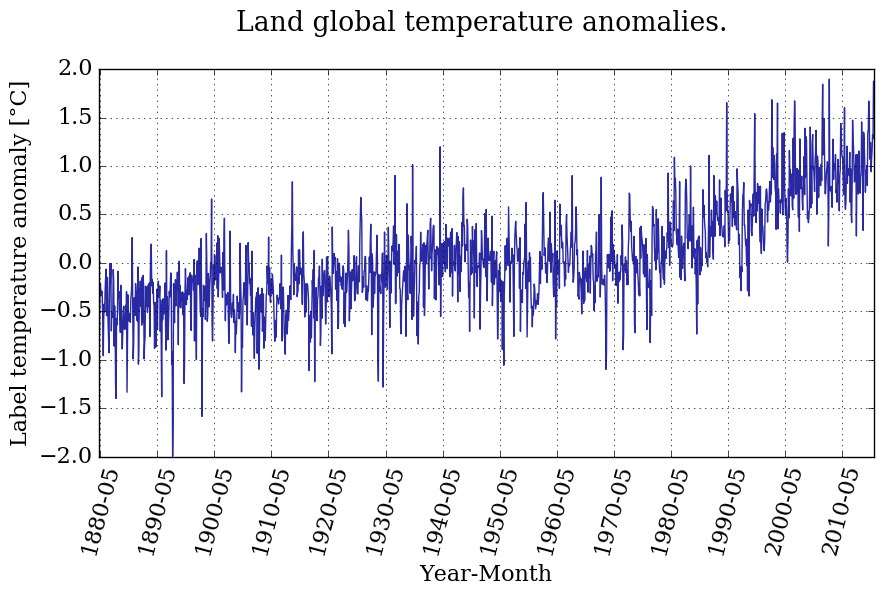

In [40]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[4::12*10],date[4::12*10],rotation=75)
pyplot.plot(dummy,T_land[:,1],color='#2929a3',ls='-', lw=1 )
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Label temperature anomaly [°C]')
pyplot.grid();

## Histograms

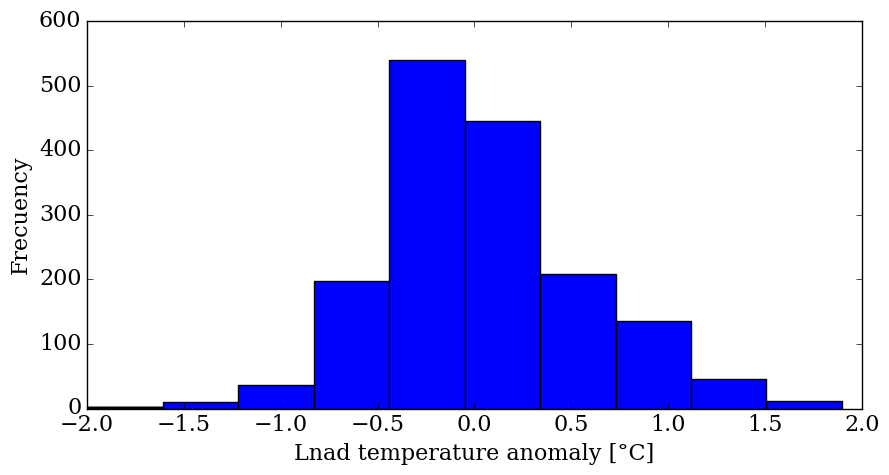

In [41]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Lnad temperature anomaly [°C]')
pyplot.ylabel('Frecuency');

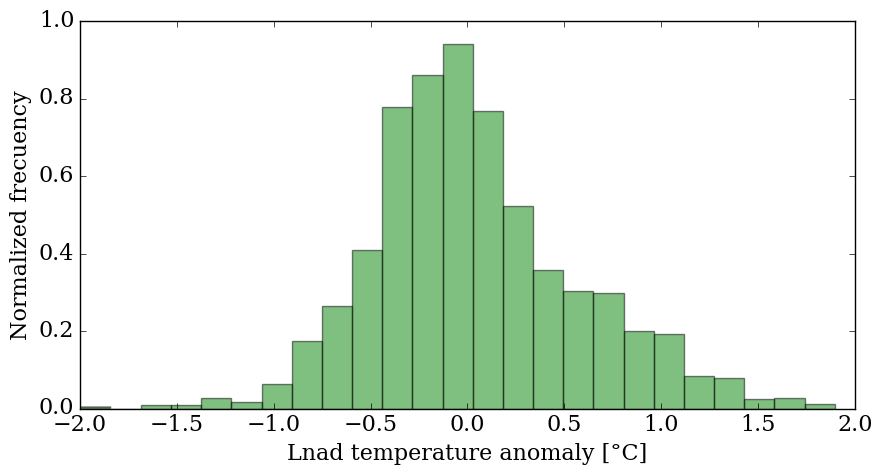

In [45]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=25, normed=True, color='green',alpha=0.5)
pyplot.xlabel('Lnad temperature anomaly [°C]')
pyplot.ylabel('Normalized frecuency');

# Let's do some stats

In [47]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])
print('The mean value is {:.5} and the median is {:.5}'.format(mean_T,median_T))

The mean value is 0.04031 and the median is -0.0276


In [48]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation is {:.5}'.format(variance_T,sigma_T))

The variance is 0.28041 and the standard deviation is 0.52954


In [49]:
from scipy import stats

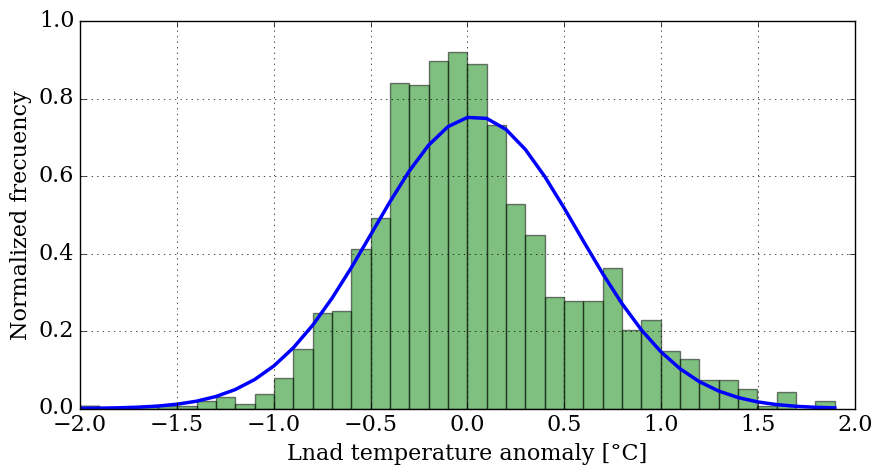

In [54]:
bins = numpy.linspace(min(T_land[:,1]),max(T_land[:,1]),40)

pyplot.figure(figsize=(10,5))

pyplot.hist(T_land[:,1], bins, normed=True, color='green',alpha=0.5)

#Plot the probability density function

pyplot.plot(bins, stats.norm.pdf(bins,mean_T,sigma_T),color='blue',ls='-',lw=2.5)

pyplot.xlabel('Lnad temperature anomaly [°C]')

pyplot.ylabel('Normalized frecuency')
pyplot.grid();